<h1 style="background: linear-gradient(90deg, #4f8cff, #a084ee); color: white; padding: 20px; border-radius: 10px; text-align: center; font-size: 2.5em; box-shadow: 0 4px 12px rgba(79,140,255,0.2);">
    ✨ Gaussian Mixture Model Clustering ✨
</h1>

<h1 style="background: linear-gradient(90deg,rgb(45, 3, 65), #a084ee); color: white; padding: 20px; border-radius: 10px; text-align: ; font-size: 2.5em; box-shadow: 0 4px 12px rgba(72, 5, 108, 0.2);">
     Importing Libraries 
</h1>

In [130]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="background: linear-gradient(90deg,rgb(45, 3, 65), #a084ee); color: white; padding: 20px; border-radius: 10px; text-align: ; font-size: 2.5em; box-shadow: 0 4px 12px rgba(72, 5, 108, 0.2);">
     Importing Dataset
</h1>

In [131]:
#load the dataset
df = pd.read_csv('Mall_Customers.csv')

<h1 style="background: linear-gradient(90deg,rgb(45, 3, 65), #a084ee); color: white; padding: 20px; border-radius: 10px; text-align: ; font-size: 2.5em; box-shadow: 0 4px 12px rgba(72, 5, 108, 0.2);">
     Lets Select The Features And Scale The It
</h1>

In [132]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Select numerical features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1 style="background: linear-gradient(90deg,rgb(45, 3, 65), #a084ee); color: white; padding: 20px; border-radius: 10px; text-align: ; font-size: 2.5em; box-shadow: 0 4px 12px rgba(72, 5, 108, 0.2);">
     Now Lets Fit The GMM Model on random n_components
</h1>

In [164]:
from sklearn.mixture import GaussianMixture

# Fit Gaussian Mixture Model (GMM) on the scaled data
gmm = GaussianMixture(n_components=4)
gmm_labels = gmm.fit_predict(X_scaled)

# Add GMM cluster labels to the dataframe
df['GMM_Cluster'] = gmm_labels

# Show cluster counts
print(df['GMM_Cluster'].value_counts())

GMM_Cluster
1    107
2     39
0     29
3     25
Name: count, dtype: int64


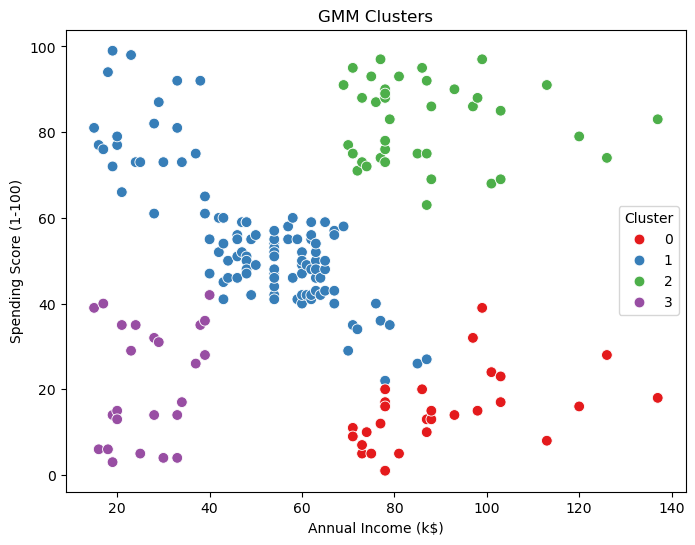

In [165]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=gmm_labels,
    palette='Set1',
    legend='full',
    s=60
)
plt.title('GMM Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# <span style="color:#f59105; font-weight:700; border-bottom:2px solid #7e57c2; padding-bottom:3px; display:inline-block">GMM Cluster Optimization</span>

<div style="background:linear-gradient(to right, #f3e5f5 0%, #ede7f6 100%); 
            padding:20px; 
            border-radius:8px;
            margin-bottom:25px;
            border-left:4px solid #673ab7">
            
<h2 style="color:#e3472b; margin-top:0">🔍 Initial Assessment</h2>
<p style="color:#4a4a4a; line-height:1.6">
    The preliminary clustering configuration exhibited suboptimal performance due to:
</p>
<ul style="color:#5d5d5d">
    <li>Arbitrary selection of cluster count</li>
    <li>Absence of hyperparameter tuning</li>
    <li>Potential model misspecification</li>
</ul>
</div>

## <span style="color:#cf020c; font-weight:600">⚙️ Optimization Strategy</span>

<div style="display:grid; grid-template-columns:1fr 1fr; gap:20px; margin:25px 0">

<div style="background:#e8eaf6; padding:18px; border-radius:8px; border-top:3px solid #5c6bc0">
<h3 style="color:#02cf50; margin-top:0">📊 Model Selection Criteria</h3>
<ul style="color:#5d5d5d">
    <li><strong>AIC (Akaike)</strong>: Balances fit and complexity</li>
    <li><strong>BIC (Bayesian)</strong>: Stronger penalty for complexity</li>
    <li>Both evaluate model likelihood</li>
</ul>
</div>

<div style="background:#e3f2fd; padding:18px; border-radius:8px; border-top:3px solid #42a5f5">
<h3 style="color:#cf1d02; margin-top:0">🧮 Implementation Approach</h3>
<ul style="color:#5d5d5d">
    <li>Grid search over <code>n_components</code></li>
    <li>Score comparison across candidates</li>
    <li>Elbow analysis of criteria values</li>
</ul>
</div>
</div>


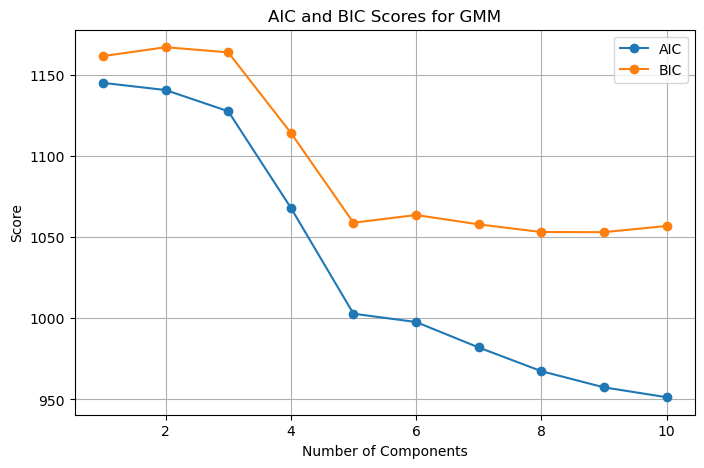

In [161]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

aic_scores = []
bic_scores = []
n_components_range = range(1, 11)  # Try from 1 to 10 clusters

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='tied', random_state=42)
    gmm.fit(X_scaled)
    aic_scores.append(gmm.aic(X_scaled))
    bic_scores.append(gmm.bic(X_scaled))

# Plot AIC and BIC
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, aic_scores, marker='o', label='AIC')
plt.plot(n_components_range, bic_scores, marker='o', label='BIC')
plt.xlabel('Number of Components')
plt.ylabel('Score')
plt.title('AIC and BIC Scores for GMM')
plt.legend()
plt.grid(True)
plt.show()


<!-- Title -->
<h2 style="color:#db6318; font-weight:600; font-size:2.6em; margin-top:20px;">
    🎯 <strong>Finding the Best Cluster Count
</h2>

<!-- Intro Box -->
<div style="
    background: #1b1f3b;
    padding: 16px 20px;
    border-radius: 10px;
    margin: 16px 0;
    border-left: 5px solid #ab47bc;
    color: #e0e0e0;
    font-size: 1em;
    line-height: 1.6;
">
    <b style="color:#ce93d8;">How it works:</b><br>
    We use two statistical scoring methods to identify the ideal number of clusters in our Gaussian Mixture Model:
</div>

<!-- AIC and BIC Boxes -->
<div style="display: flex; gap: 16px; margin: 20px 0; flex-wrap: wrap;">
<!-- AIC Box -->
    <div style="
        flex: 1;
        background: #ede7f6;
        padding: 16px;
        border-radius: 10px;
        border-top: 4px solid #5e35b1;
        color: #3e3065;
        min-width: 250px;
    ">
        <b style="color:#4527a0;">AIC (Akaike Information Criterion)</b><br>
        <ul style="padding-left: 18px; margin-top: 8px;">
            <li>Rewards model accuracy</li>
            <li>Applies a mild penalty for complexity</li>
        </ul>
    </div>
<!-- BIC Box -->
    <div style="
        flex: 1;
        background: #e3f2fd;
        padding: 16px;
        border-radius: 10px;
        border-top: 4px solid #1e88e5;
        color: #0d47a1;
        min-width: 250px;
    ">
        <b style="color:#1565c0;">BIC (Bayesian Information Criterion)</b><br>
        <ul style="padding-left: 18px; margin-top: 8px;">
            <li>Rewards model accuracy</li>
            <li>Applies a stronger penalty for complexity</li>
        </ul>
    </div>

</div>

<!-- Tip Box -->
<div style="
    background: #e0f7fa;
    padding: 16px 20px;
    border-radius: 10px;
    margin: 20px 0;
    color: #006064;
    font-size: 1em;
    line-height: 1.6;
">
    <strong style="color:#00796b;">💡 Tip:</strong>  
    Look for the “elbow point” in the AIC or BIC plot — the spot where score improvements level off. That’s usually your best cluster count.
</div>


<h1 style="background: linear-gradient(90deg,rgb(45, 3, 65), #a084ee); color: white; padding: 20px; border-radius: 10px; text-align: ; font-size: 2.5em; box-shadow: 0 4px 12px rgba(72, 5, 108, 0.2);">
    Now Lets See The Result
</h1>

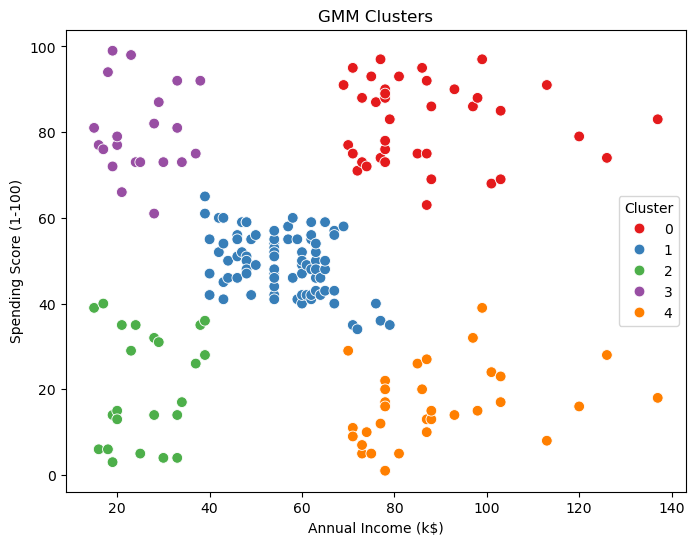

In [162]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X['Annual Income (k$)'],
    y=X['Spending Score (1-100)'],
    hue=gmm_labels,
    palette='Set1',
    legend='full',
    s=60
)
plt.title('GMM Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [163]:
from sklearn.metrics import silhouette_score

# Compute silhouette score for GMM clustering (if more than 1 cluster)
if len(set(gmm_labels)) > 1:
    sil_gmm = silhouette_score(X, gmm_labels)
    print(f"Silhouette Score for GMM: {sil_gmm:.3f}")
else:
    print("Silhouette score is not defined (only one cluster).")

Silhouette Score for GMM: 0.553
